In [15]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

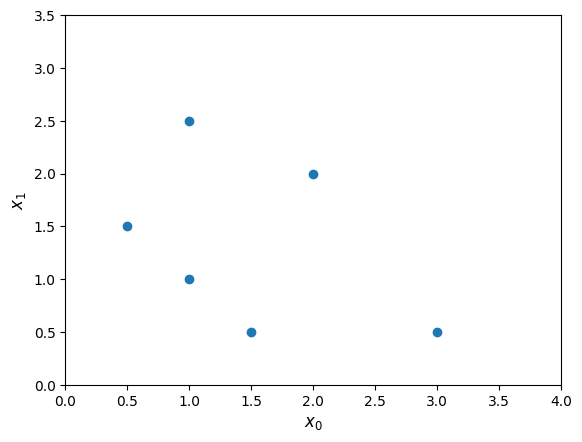

In [7]:
plt.plot(X_train[:, 0], X_train[:, 1], 'o')

plt.xlim([0, 4])
plt.ylim([0, 3.5])
plt.ylabel('$x_1$', fontsize=12)
plt.xlabel('$x_0$', fontsize=12)
plt.show()

In [8]:
def sigmoid(z): return 1/(1 + np.exp(-z))

In [9]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost function
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1-f_wb_i) 
    cost /= m
    
    return cost

In [10]:
w_tmp = np.array([1, 1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


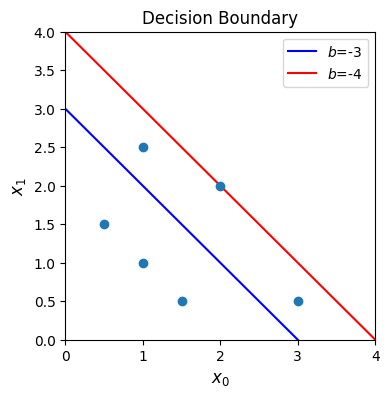

In [13]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0, x1, c='blue', label="$b$=-3")
ax.plot(x0, x1_other, c='red', label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plt.plot(X_train[:, 0], X_train[:, 1], 'o')
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [14]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


In [16]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for logistic regression
    """

    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] += err_i * X[i,j]      #scalar
        dj_db += err_i
    dj_dw /= m                                   #(n,)
    dj_db /= m                                   #scalar
        
    return dj_db, dj_dw  

In [17]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [19]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w -= alpha * dj_dw               
        b -= alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing


In [20]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870456   
Iteration 2000: Cost 0.08460064176930081   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.042907594216820076   
Iteration 5000: Cost 0.034338477298845684   
Iteration 6000: Cost 0.028603798022120097   
Iteration 7000: Cost 0.024501569608793   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


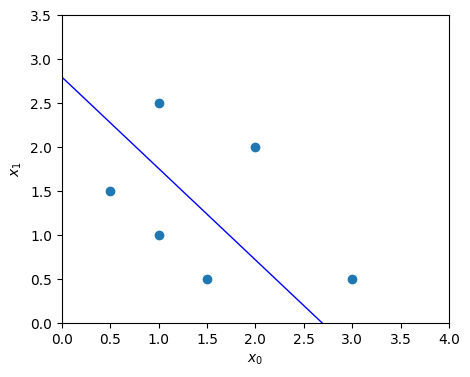

In [23]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
#plt.plot(w_out[:, 0], w_out[:, 1])

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plt.plot(X_train[:, 0], X_train[:, 1], 'o')

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
plt.plot([0, x0],[x1, 0], c='blue', lw=1)
plt.show()

In [28]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

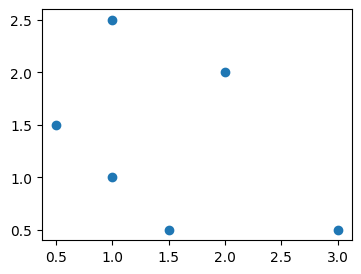

In [29]:
fig,ax = plt.subplots(1, 1, figsize=(4,3))
plt.plot(X[:, 0], X[:, 1], 'o')
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

In [31]:
y_pred = lr_model.predict(X)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 1 1 1]


In [32]:
print("Accuracy on training set:", lr_model.score(X, y))

Accuracy on training set: 1.0
